INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de la segmentation d'objets d'intérêt (Méthode simple Gaussienne)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture d'images pour entraîner le modèle. (Images provenant PETS 2006, http://www.cvg.reading.ac.uk/PETS2006/data.html)

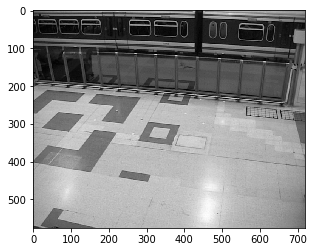

In [2]:
image1 = (cv2.imread('in000001.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(image1, cmap = plt.get_cmap('gray'))
plt.show()
image2 = (cv2.imread('in000003.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image3 = (cv2.imread('in000004.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image4 = (cv2.imread('in000005.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)

Dans cet exemple, les calculs sont faits sur une image en tons de gris. Pour entraîner le modèle, on doit calculer la moyenne et la variance de chaque pixel de l'image, puisque la modèle est une distribution Gaussienne. Ce modèle est le modèle de l'arrière-plan de la scène. 

In [3]:
Moy = (image1 + image2 + image3 + image4)/4.0
Var = (np.power(image1,2) + np.power(image2,2) + np.power(image3,2) + np.power(image4,2))/4.0 - np.power(Moy,2)

In [4]:
print(Moy)

[[ 84.5   64.25  67.75 ... 105.75 105.   104.  ]
 [ 92.5   72.75  75.75 ... 101.   100.25  98.25]
 [104.    84.    88.25 ... 109.75 109.5  107.75]
 ...
 [ 54.5   40.    43.   ... 101.    99.25 100.  ]
 [ 51.75  40.    44.25 ...  95.75  97.75 103.5 ]
 [  9.5    6.75   9.75 ...   2.25  10.    21.5 ]]


In [5]:
print(Var)

[[0.75   2.1875 4.6875 ... 1.6875 4.5    7.5   ]
 [1.25   5.1875 0.6875 ... 1.     1.1875 1.6875]
 [2.     9.5    1.1875 ... 1.6875 1.25   3.1875]
 ...
 [6.25   2.     3.5    ... 0.5    0.1875 3.5   ]
 [1.1875 1.5    0.6875 ... 0.1875 0.6875 2.25  ]
 [1.25   0.1875 0.1875 ... 0.1875 0.5    0.75  ]]


Lecture de l'image qui sera utilisée pour la détection de l'objet d'intérêt. 

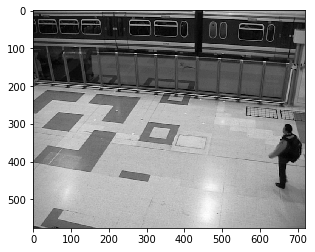

In [6]:
imagedet = (cv2.imread('in000021.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(imagedet, cmap = plt.get_cmap('gray'))
plt.show()

Le ou les objets d'intérêt sont constitué des pixels qui ne correpondent pas au modèle d'arrière-plan. Ces pixels sont considérés comme l'avant-plan.  

In [7]:
n = 10 #Ajuste la sensibilité de la détection
Avantplan = np.abs(imagedet - Moy)> n*np.sqrt(Var)

Affichage du résultats avec l'avant-plan en blanc.

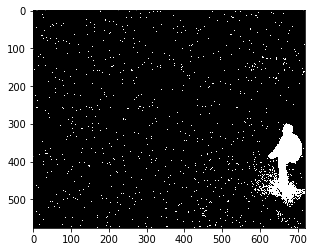

In [8]:
plt.imshow(~Avantplan,plt.get_cmap('binary'))
plt.show()